## Tarea: Ajuste y Comparación de Modelos de la familia SARIMA

¡Bienvenido(a)!
Te invitamos a realizar el segundo trabajo.
- Objetivo: Compar modelos de series de tiempo a través de casos prácticos desarrollados en Python.
- Tipo de actividad: Individual
- Tipo de evaluación: Sumativa 
- Ponderación: 15%
- Puntaje: 60 puntos
- Calificación: Escala de 1 a 7, con una exigencia de 50%. La nota mínima para aprobar es 4.0.

## Enunciado

### Introducción

Esta tarea está pensada en abordar y profundizar los métodos probabilísticos para ajustar series temporales, a través de los modelos de la familia ARIMA. En primer lugar se realizará un análisis descriptivo para proponer los órdenes del modelo SARIMA(p,d,q)x(P,D,Q)[s]. Con el objetivo de comprender las técnicas de selección de modelos se ajustarán diferentes modelos propuestos junto con el modelo propuesto por autoarima con el fin de seleccionar el modelo más apropiado y analizar si es o no adecuado. Además, se determinarán las predicciones para un periodo de interés.

### Descripción del problema

La serie "IPC.xlsx" (disponible en la plataforma) corresponde al índice de precio al consumidor de  Chile desde abril de 1989 hasta junio de 2023 medido de forma mensual. El objetivo del análisis es predecir el IPC para el segundo semestre de 2023, es decir, de julio a diciembre de 2023.

#### Preparación de la data:
Dar el formato adecuado para aplicar los métodos de series de tiempo en Python. Además, de la data completa separar en dos partes (entrenamiento y validación), donde reserve la información de enero a junio de 2023 que actuará como muestra de validación mientras que el resto será la muestra de entrenamiento de los modelos. 

In [1]:
## Librerias
import numpy as np
import pandas as pd
from darts import TimeSeries
import matplotlib.pyplot as plt
import pmdarima as pm
import statsmodels.api as sm

from darts.utils.statistics import plot_acf, plot_pacf
from darts.models import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')

In [2]:
## Importar Datos (La base de datos ya está cargada, no es necesario volver a cargar)
df = pd.read_excel('IPC.xlsx')
df['Fecha'] = pd.to_datetime(df[['YEAR', 'MONTH']].assign(day=1))
print(df.head())

## Datos y Fecha
df.set_index('Fecha', inplace=True)
df.drop(['YEAR', 'MONTH'], axis=1, inplace=True)
df.head()

   YEAR  MONTH        IPC      Fecha
0  1989      4  17.325726 1989-04-01
1  1989      5  17.665933 1989-05-01
2  1989      6  17.977622 1989-06-01
3  1989      7  18.305059 1989-07-01
4  1989      8  18.487909 1989-08-01


,IPC
Fecha,
1989-04-01,17.325726
1989-05-01,17.665933
1989-06-01,17.977622
1989-07-01,18.305059
1989-08-01,18.487909


In [3]:
# Formato de Serie de Tiempo: Guardar la información en
# ipc: serie completa
# ipc_train: serie entrenamiento
# ipc_val: serie validación

# your code here
ipc = TimeSeries.from_series(df)

# Obtener el punto de división basado en los últimos 6 meses
split_date = ipc.end_time() - pd.DateOffset(months=5)

# Separar los datos en entrenamiento y validación
ipc_train, ipc_val = ipc.split_before(pd.Timestamp(split_date))


In [4]:
# Pruebas para medir si el formato es correcto
assert len(ipc)==411, "fallaste la prueba de len(ipc)==411"
assert len(ipc_train)==405, "fallaste la prueba de len(ipc)==405"
assert len(ipc_val)==6, "fallaste la prueba de len(ipc)==6"

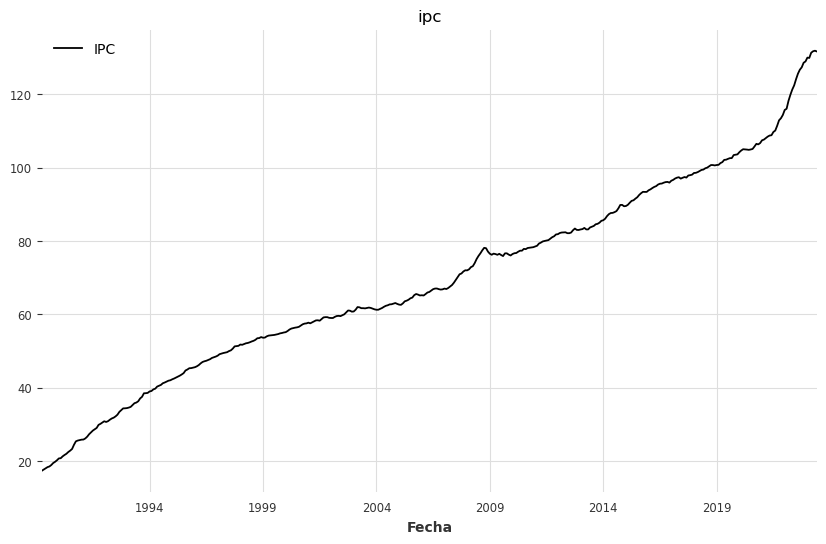

In [5]:
df.plot(figsize=(10, 6))
plt.title('ipc')
plt.show()

Comprobamos que la serie corresponde a la misma de la tarea 1, donde sabemos que la serie original no es estacionaria.

### (Parte 2) Ajuste un Modelo mediante autoarima

- Ajustar un modelo SARIMA a la serie de entrenamiento. Por temas de tiempo de computo asumir que el periodo es 1, y considerar el resto de los parámetros de auto_arima los que vienen por defecto
- Guardar el AIC
- Aplicar el test de Box-Pierce-Ljung para H=18 y guardar p-valor
- Realizar y guardar las predicciones
- Guardar el RMSE de las predicciones

In [6]:
## Guardar la información en:
# mod0: # nombre del modelo 
# aic0: # valor del AIC para el modelo
# p0: valor del p-valor del test de Box-Pierce-Ljung
# Inter_p0: # Debe responder: "El modelo es apropiado" o "El modelo no es apropiado", de acuerdo con la interpretación del p-valor
# pred0: # nombre donde se guardarán las predicciones
# rmse0: # valor del rmse

# your code here
from statsmodels.stats.diagnostic import acorr_ljungbox

# Convierte la serie temporal de Darts a una serie de pandas
ipc_train_pd = ipc_train.pd_series()
ipc_val_pd = ipc_val.pd_series()


# Ajustar el modelo SARIMA utilizando auto_arima
mod0 = pm.auto_arima(ipc_train_pd, seasonal=True, stepwise=True,
                      suppress_warnings=True, error_action="ignore", trace=True, m=1)




Performing stepwise search to minimize aic
 ARIMA(2,2,2)(0,0,0)[0]             : AIC=121.253, Time=0.33 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=245.508, Time=0.10 sec
 ARIMA(1,2,0)(0,0,0)[0]             : AIC=199.946, Time=0.09 sec
 ARIMA(0,2,1)(0,0,0)[0]             : AIC=138.800, Time=0.04 sec
 ARIMA(1,2,2)(0,0,0)[0]             : AIC=120.853, Time=0.35 sec
 ARIMA(0,2,2)(0,0,0)[0]             : AIC=118.886, Time=0.21 sec
 ARIMA(0,2,3)(0,0,0)[0]             : AIC=120.882, Time=0.39 sec
 ARIMA(1,2,1)(0,0,0)[0]             : AIC=119.290, Time=0.14 sec
 ARIMA(1,2,3)(0,0,0)[0]             : AIC=122.270, Time=0.57 sec
 ARIMA(0,2,2)(0,0,0)[0] intercept   : AIC=120.417, Time=0.40 sec

Best model:  ARIMA(0,2,2)(0,0,0)[0]          
Total fit time: 2.621 seconds


In [7]:
import statsmodels.api as sm
# Guarda el AIC
aic0 = mod0.aic()

# Realiza el test de Box-Pierce-Ljung
# _, p_value = 
# p0 = p_value[1][-1]
# p_value

result = acorr_ljungbox(mod0.resid() , lags=[18], return_df=True)
p0 = result.loc[18, 'lb_pvalue']
p0

1.8561925233666172e-05

In [8]:
from sklearn.metrics import mean_squared_error

# Interpreta el p-valor
if p0 < 0.05:
    Inter_p0 = "El modelo no es apropiado"
else:
    Inter_p0 = "El modelo es apropiado"

# Realiza y guarda las predicciones
pred0 = mod0.predict(n_periods=len(ipc_val))

# Calcula el RMSE de las predicciones
rmse0 = np.sqrt(mean_squared_error(ipc_val_pd, pred0))

# Imprime los resultados
print(f"Model: {mod0}")
print(f"AIC: {aic0}")
print(f"p-value: {p0}")
print(f"Interpretation: {Inter_p0}")
print(f"Predictions: {pred0}")
print(f"RMSE: {rmse0}")


Model:  ARIMA(0,2,2)(0,0,0)[0]          
AIC: 118.88636648936048
p-value: 1.8561925233666172e-05
Interpretation: El modelo no es apropiado
Predictions: 2023-01-01    129.800426
2023-02-01    130.792906
2023-03-01    131.785387
2023-04-01    132.777867
2023-05-01    133.770347
2023-06-01    134.762827
Freq: MS, dtype: float64
RMSE: 1.5498133066800388


Es posible evidenciar que este modelo 0 propone un ARIMA(2,0,2) con un RMSE =1.55. Sabemos que no es estacionario, el P value 0,00001 nos indica que los rezagos estan autocorrelacionados y que no es un buen modelo.

In [9]:
# Prueba oculta: Check del modelo 

In [10]:
# Prueba oculta: Check para el p-valor de la prueba de Box-Pierce-Ljung

In [11]:
# Prueba oculta: Check para las predicciones



### (Parte 3) Ajuste un Modelo SARIMA desde el analisis descriptivo

- Realizar un análisis descriptivo de la serie que incluya grafica, ACF y PACF tanto de la serie original como diferenciada y cualquier estadístico que considere necesario para reconocer el orden del modelo.
- Proponer un modelo desde el análisis descriptivo, es decir, el conjunto de ordenes del modelo SARIMA(p,d,q)x(P,D,Q)[s].
- Ajustar el modelo.
- Guardar el AIC
- En caso que el AIC de este modelo sea mayor al AIC del modelo propuesto por autoarima, proponer otro modelo hasta encontrar uno mejor.
- Aplicar el test de Box-Pierce para H=18 y guardar p-valor
- En caso que el modelo no sea adecuado en términos del test de blancura proponer otro modelo.
- Realizar y guardar las predicciones
- Guardar el RMSE de las predicciones


### Serie Orginal

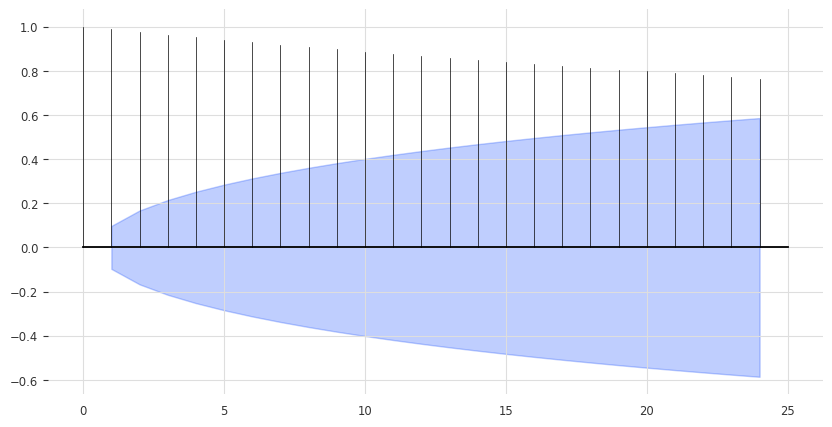

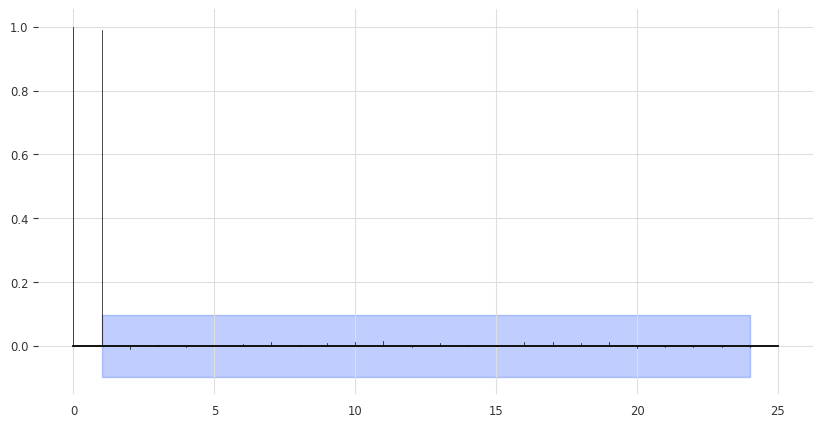

In [12]:
## Guardar la información en:
# mod1: # nombre del modelo 
# aic1: # valor del AIC para el modelo
# pred1: # nombre donde se guardarán las predicciones
# rmse1: # valor del rmse

# your code here
# Graficar ACF serie original
plot_acf(ipc_train)

# Graficar PACF serie original
plot_pacf(ipc_train)

A partir del correlograma, es posible evidenciar lo que ya sabíamos, que la serie es no estacionaria y que requiere transformación y diferenciación.

### Serie transformada y diferenciada

De la tarea 1, ya sabemos que la tendencia de la serie original se ajusta muy bien a un polinomio de orden 7. Propongo restar los valores de la serie origina a dicha tendencia de orden 7 para transformar la serie

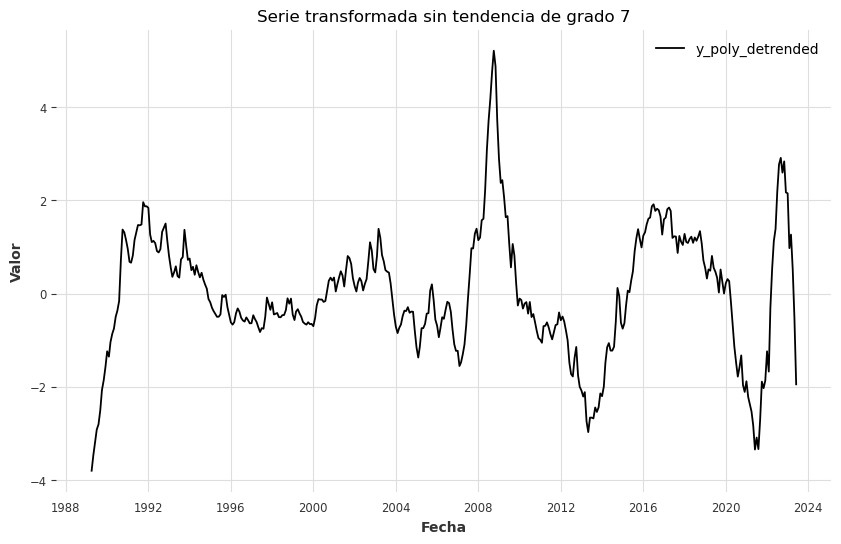

In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Ajustar un modelo polinomial de orden 7
poly = PolynomialFeatures(degree=7)
X = np.array(range(len(ipc))).reshape(-1, 1)
y = df.values
X_poly = poly.fit_transform(X)
poly_regressor = LinearRegression().fit(X_poly, y)

# Restar el modelo ajustado de los datos originales
y_poly_detrended = y - poly_regressor.predict(X_poly)

# Crear un gráfico de la serie y_poly_detrended
plt.figure(figsize=(10, 6))
plt.plot(df.index, y_poly_detrended, label='y_poly_detrended')
plt.title('Serie transformada sin tendencia de grado 7')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)
plt.show()

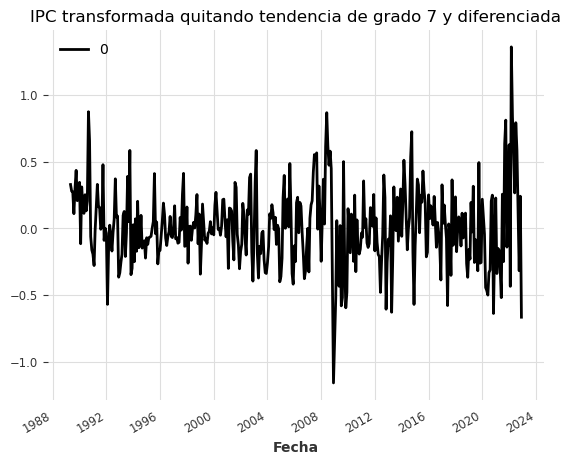

In [14]:
# Asegurarse de que el array de numpy sea unidimensional
y_poly_detrended = y_poly_detrended.flatten()

# Convertir el array de numpy a una serie de pandas
y_poly_detrended_pd = pd.Series(y_poly_detrended)
y_poly_detrended_pd.index = df.index

# Convertir la serie de pandas a una serie de tiempo de Darts
y_poly_detrended_ts = TimeSeries.from_series(y_poly_detrended_pd)

# Diferenciando la serie 
y_poly_detrended_ts_diff = y_poly_detrended_ts.diff()

# Obtener el punto de división basado en los últimos 6 meses
split_date = y_poly_detrended_ts_diff.end_time() - pd.DateOffset(months=5)

# Separar los datos en entrenamiento y validación
ipc_train_diff, ipc_val_diff = y_poly_detrended_ts_diff.split_before(split_date)

# Convierte la serie temporal de Darts a una serie de pandas
ipc_train_diff_pd = ipc_train_diff.pd_series()
ipc_val_diff_pd = ipc_val_diff.pd_series()

ipc_train_diff.plot()
plt.title('IPC transformada quitando tendencia de grado 7 y diferenciada')
plt.show()


Ahora, verifiquemos que esta serie transformada y diferenciada sea estacionaria

In [15]:
from statsmodels.tsa.stattools import adfuller, kpss

# Realizar el test de Dickey-Fuller
result = adfuller(ipc_train_diff_pd)
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

# Realizar el test de KPSS
result = kpss(ipc_train_diff_pd)
print(f'KPSS Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -5.380742159547665
p-value: 3.7173744517468276e-06
KPSS Statistic: 0.07638617686253497
p-value: 0.1


Es posible ver que tanto en la prueba ADF como con el estadístico KPSS la serie es estacionaria. 

Ahora, vamos a graficar el correlograma de esta serie diferenciada

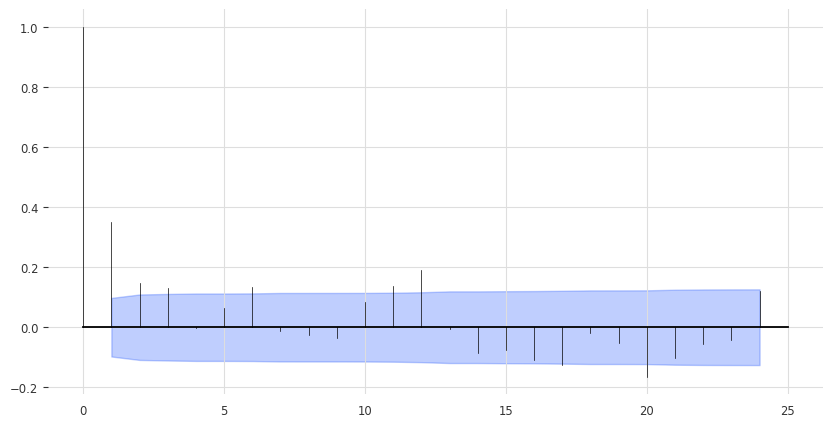

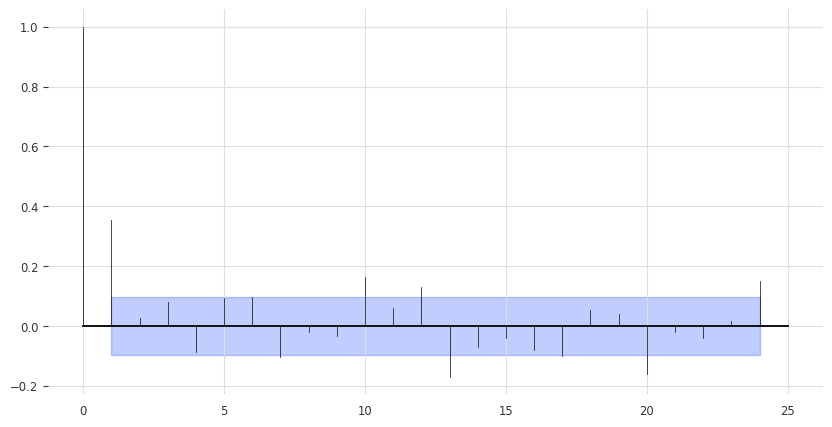

In [16]:
# Graficar ACF serie diferenciada
plot_acf(ipc_train_diff)

# Graficar PACF serie diferenciada
plot_pacf(ipc_train_diff)

Ahora, vamos a entrenar un modelo SARIMA, con una componente estacional = 6, dado que es posible evidenciar lags significativos en 6, 12 y 24.

In [17]:
# Ajustar el modelo SARIMA utilizando auto_arima
mod1 = pm.auto_arima(ipc_train_diff_pd, seasonal=True, stepwise=True,
                      suppress_warnings=True, error_action="ignore", trace=True,
                     m=6)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[6] intercept   : AIC=56.059, Time=7.40 sec
 ARIMA(0,0,0)(0,0,0)[6] intercept   : AIC=147.778, Time=0.14 sec
 ARIMA(1,0,0)(1,0,0)[6] intercept   : AIC=88.422, Time=0.86 sec
 ARIMA(0,0,1)(0,0,1)[6] intercept   : AIC=96.140, Time=0.99 sec
 ARIMA(0,0,0)(0,0,0)[6]             : AIC=146.833, Time=0.03 sec
 ARIMA(2,0,2)(0,0,1)[6] intercept   : AIC=92.791, Time=3.68 sec
 ARIMA(2,0,2)(1,0,0)[6] intercept   : AIC=89.922, Time=3.79 sec
 ARIMA(2,0,2)(2,0,1)[6] intercept   : AIC=75.129, Time=23.70 sec
 ARIMA(2,0,2)(1,0,2)[6] intercept   : AIC=inf, Time=28.20 sec
 ARIMA(2,0,2)(0,0,0)[6] intercept   : AIC=97.378, Time=1.00 sec
 ARIMA(2,0,2)(0,0,2)[6] intercept   : AIC=80.465, Time=19.01 sec
 ARIMA(2,0,2)(2,0,0)[6] intercept   : AIC=75.928, Time=17.40 sec
 ARIMA(2,0,2)(2,0,2)[6] intercept   : AIC=47.893, Time=30.89 sec
 ARIMA(1,0,2)(2,0,2)[6] intercept   : AIC=51.298, Time=28.60 sec
 ARIMA(2,0,1)(2,0,2)[6] intercept   : AIC=inf, Time=22.8

In [18]:
# mod1: # nombre del modelo 
# aic1: # valor del AIC para el modelo
# pred1: # nombre donde se guardarán las predicciones
# rmse1: # valor del rmse

# Guarda el AIC
aic1 = mod1.aic()

result2 = sm.stats.acorr_ljungbox(mod1.resid() , lags=[18], return_df=True)
p1 = result2.loc[18, 'lb_pvalue']
p1

0.20176187933603495

In [19]:
# Interpreta el p-valor
if p1 < 0.05:
    Inter_p1 = "El modelo no es apropiado"
else:
    Inter_p1 = "El modelo es apropiado"

# Realiza y guarda las predicciones
pred1 = mod1.predict(n_periods=len(ipc_val_diff))

# Calcula el RMSE de las predicciones
rmse1 = np.sqrt(mean_squared_error(ipc_val_diff_pd, pred1))

# Imprime los resultados
print(f"Model: {mod1}")
print(f"AIC: {aic1}")
print(f"p-value: {p1}")
print(f"Interpretation: {Inter_p1}")
print(f"Predictions: {pred1}")
print(f"RMSE: {rmse1}")

Model:  ARIMA(3,0,3)(2,0,2)[6] intercept
AIC: 43.7535092982655
p-value: 0.20176187933603495
Interpretation: El modelo es apropiado
Predictions: 2023-01-01   -0.095660
2023-02-01   -0.056162
2023-03-01    0.126493
2023-04-01    0.040992
2023-05-01   -0.006356
2023-06-01   -0.161115
Freq: MS, dtype: float64
RMSE: 0.8724132861901429


Es posible identificar que el modelo propuesto es un SARIMA(3,0,3)(2,0,2)[6]. El AIC es menor que el obtenido en el punto 1. Así mismo, el p-value indica que el modelo es apropiado. El RMSE= 0.87 también nos brinda mucha confianza y nos muestra que es un excelente modelo.

In [20]:
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                       SARIMAX Results                                        
==============================================================================================
Dep. Variable:                                      y   No. Observations:                  404
Model:             SARIMAX(3, 0, 3)x(2, 0, [1, 2], 6)   Log Likelihood                  -9.877
Date:                                Thu, 23 Nov 2023   AIC                             43.754
Time:                                        21:03:18   BIC                             91.770
Sample:                                    05-01-1989   HQIC                            62.761
                                         - 12-01-2022                                         
Covariance Type:                                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.001      0.232      0.817      -0.003       0.003
ar.L1         -0.6702      0.152     -4.409      0.000      -0.968      -0.372
ar.L2          0.5291      0.132      3.994      0.000       0.269       0.789
ar.L3          0.5608      0.073      7.721      0.000       0.418       0.703
ma.L1          1.0350      0.154      6.735      0.000       0.734       1.336
ma.L2         -0.2141      0.188     -1.139      0.255      -0.582       0.154
ma.L3         -0.4984      0.095     -5.245      0.000      -0.685      -0.312
ar.S.L6        0.0203      0.036      0.563      0.573      -0.050       0.091
ar.S.L12       0.9568      0.036     26.717      0.000       0.887       1.027
ma.S.L6       -0.0185      0.063     -0.294      0.769      -0.142       0.105
ma.S.L12      -0.8620      0.063    -13.695      0.000      -0.985      -0.739
sigma2         0.0613      0.004     15.217      0.000       0.053       0.069
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                75.78
Prob(Q):                              0.96   Prob(JB):                         0.00
Heteroskedasticity (H):               2.53   Skew:                             0.22
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

Analizando el test de Ljung-Box, podemos afirmar que el modelo presenta ruido blanco en los residuos. Sin embargo, vemos que el modelo no presenta heterosedasticidad, y que los residuos no se comportan normal. 

In [21]:
# Prueba oculta: Check del modelo mejor que autoarima según AIC

In [22]:
# Prueba oculta: Check para el p-valor de la prueba de Box-Pierce-Ljung

In [23]:
# Prueba oculta: Check del RMSE del modelo propuesto

### (Parte 4) Predecir de julio a diciembre de 2023

- Utilizar los órdenes del mejor modelo ajustado con la muestra de entrenamiento y ajustar con toda la muestra.
- Realizar las predicciones para los meses de julio a diciembre de 2023.

In [29]:
## Guardar la información en:
# modfinal: # nombre del modelo 
# predicciones: # nombre donde se guardarán las predicciones

modfinal = mod1

# Convertir la serie de tiempo diferenciada a un formato de array de numpy
y_poly_detrended_diff_np = y_poly_detrended_ts_diff.pd_series().to_numpy()

# Ajustar el modelo con la serie transformada
mod1.fit(y_poly_detrended_diff_np)

# Realizar las predicciones para los próximos 6 meses
predicciones_diff = mod1.predict(6)

predicciones_diff

array([-0.52079897, -0.51102846, -0.22129407, -0.16277172, -0.34713585,
       -0.37199378])

In [30]:
# Invertir la transformación polinómica para obtener el componente polinomial
X_future = np.array(range(len(y_poly_detrended_diff_np), len(y_poly_detrended_diff_np) + 6)).reshape(-1, 1)
poly_future = poly.fit_transform(X_future)
predicciones_detrended = poly_regressor.predict(poly_future)

# Sumar las predicciones diferenciadas al componente polinomial
predicciones = predicciones_detrended + predicciones_diff.reshape(-1, 1)

predicciones

array([[133.15932558],
       [134.42530753],
       [136.00673526],
       [137.39326446],
       [138.57406461],
       [139.95238472]])

In [26]:
# Prueba oculta: Check para las predicciones del modelo propuesto